In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Chicago_Crime_Detective.csv


Reading the data

In [2]:
data = pd.read_csv("/kaggle/input/Chicago_Crime_Detective.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
...,...,...,...,...,...,...,...,...,...,...
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001


Parsing the date: Converting date from string to date type

In [4]:
import dateutil
data['Date'] = data['Date'].apply(dateutil.parser.parse, dayfirst = True)

Checking for missing values

In [5]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012


In [6]:
data.isnull().any()

Unnamed: 0             False
ID                     False
Date                   False
LocationDescription    False
Arrest                 False
Domestic               False
Beat                   False
District                True
CommunityArea           True
Year                   False
dtype: bool

Removing all the null values

In [7]:
data.dropna(inplace = True)

Rechecking if there's still any null (LOL)

In [8]:
data.isnull().any()

Unnamed: 0             False
ID                     False
Date                   False
LocationDescription    False
Arrest                 False
Domestic               False
Beat                   False
District               False
CommunityArea          False
Year                   False
dtype: bool

Check the type of the features(/columns)

In [9]:
data.dtypes

Unnamed: 0                      int64
ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                       object
CommunityArea                  object
Year                            int64
dtype: object

In [10]:
data.describe()

,Unnamed: 0,ID,Beat,Year
count,148587.000000,1.485870e+05,148587.000000,148587.000000
mean,74699.303835,5.818489e+06,1255.571261,2007.423045
std,43222.906910,1.931807e+06,700.849123,2.880300
min,0.000000,1.310988e+06,111.000000,2001.000000
25%,37260.500000,4.060230e+06,722.000000,2005.000000
50%,74707.000000,5.858669e+06,1115.000000,2007.000000
75%,111928.500000,7.630332e+06,1733.000000,2010.000000
max,191605.000000,9.019376e+06,2535.000000,2012.000000


To find the median date, we need to sort the data by median. By default, it's ascending.

In [11]:
data.sort_values(by = 'Date', inplace = True)

In [12]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
191605,191605,1310988,2001-01-01 17:00:00,STREET,False,False,831,8,66,2001
188849,188849,1402871,2001-01-03 00:00:00,STREET,False,False,233,2,40,2001
182575,182575,1611268,2001-01-07 23:00:00,STREET,False,False,2532,25,25,2001
180667,180667,1806334,2001-01-08 12:00:00,PARKING LOT/GARAGE(NON.RESID.),False,False,813,8,56,2001
178872,178872,1753476,2001-01-09 12:00:00,STREET,False,False,834,8,70,2001


In [13]:
data.count()

Unnamed: 0             148587
ID                     148587
Date                   148587
LocationDescription    148587
Arrest                 148587
Domestic               148587
Beat                   148587
District               148587
CommunityArea          148587
Year                   148587
dtype: int64

In [14]:
148587/2

74293.5

Median date will be the 74293th id

In [15]:
data.iloc[74293]

Unnamed: 0                           74710
ID                                 5850542
Date                   2007-10-20 00:00:00
LocationDescription                 STREET
Arrest                               False
Domestic                             False
Beat                                  1533
District                                15
CommunityArea                           25
Year                                  2007
Name: 74710, dtype: object

What is the Month and Year of the median date in our dataset? 
Answer: October 2007

Making a third column with the month

In [16]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [17]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
191605,191605,1310988,2001-01-01 17:00:00,STREET,False,False,831,8,66,2001,1
188849,188849,1402871,2001-01-03 00:00:00,STREET,False,False,233,2,40,2001,1
182575,182575,1611268,2001-01-07 23:00:00,STREET,False,False,2532,25,25,2001,1
180667,180667,1806334,2001-01-08 12:00:00,PARKING LOT/GARAGE(NON.RESID.),False,False,813,8,56,2001,1
178872,178872,1753476,2001-01-09 12:00:00,STREET,False,False,834,8,70,2001,1


In [18]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
191605,191605,1310988,2001-01-01 17:00:00,STREET,False,False,831,8,66,2001,1
188849,188849,1402871,2001-01-03 00:00:00,STREET,False,False,233,2,40,2001,1
182575,182575,1611268,2001-01-07 23:00:00,STREET,False,False,2532,25,25,2001,1
180667,180667,1806334,2001-01-08 12:00:00,PARKING LOT/GARAGE(NON.RESID.),False,False,813,8,56,2001,1
178872,178872,1753476,2001-01-09 12:00:00,STREET,False,False,834,8,70,2001,1


Grouping the data by month, counting no. of records in each month.

In [19]:
data.groupby('month')['ID'].count()

month
1     12213
2     10457
3     12246
4     11618
5     12715
6     12499
7     12960
8     12804
9     12357
10    13176
11    12405
12    13137
Name: ID, dtype: int64

In which month did the lowest motor vehicle thefts occur? 
Answer: February

Adding a week day name column

In [20]:
data['day'] = pd.DatetimeIndex(data['Date']).day_name()

In [21]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
191605,191605,1310988,2001-01-01 17:00:00,STREET,False,False,831,8,66,2001,1,Monday
188849,188849,1402871,2001-01-03 00:00:00,STREET,False,False,233,2,40,2001,1,Wednesday
182575,182575,1611268,2001-01-07 23:00:00,STREET,False,False,2532,25,25,2001,1,Sunday
180667,180667,1806334,2001-01-08 12:00:00,PARKING LOT/GARAGE(NON.RESID.),False,False,813,8,56,2001,1,Monday
178872,178872,1753476,2001-01-09 12:00:00,STREET,False,False,834,8,70,2001,1,Tuesday


Counting no. of records for each day.

In [22]:
data.groupby('day')['ID'].count()

day
Friday       22239
Monday       21292
Saturday     20984
Sunday       20493
Thursday     20967
Tuesday      21217
Wednesday    21395
Name: ID, dtype: int64

On which weekday did most motor vehicle thefts occur?
Answer: Friday

Counting no. of arrests made each month.

In [23]:
data[data['Arrest'] == True].groupby('month').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,day
month,,,,,,,,,,,
1,907,907,907,907,907,907,907,907,907,907,907
2,784,784,784,784,784,784,784,784,784,784,784
3,919,919,919,919,919,919,919,919,919,919,919
4,869,869,869,869,869,869,869,869,869,869,869
5,894,894,894,894,894,894,894,894,894,894,894
6,929,929,929,929,929,929,929,929,929,929,929
7,958,958,958,958,958,958,958,958,958,958,958
8,907,907,907,907,907,907,907,907,907,907,907
9,877,877,877,877,877,877,877,877,877,877,877


Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 
Answer: December

Find number of crimes for each year

In [24]:
data.groupby('Year')['ID'].count()

Year
2001      122
2002      494
2003    12977
2004    16823
2005    16403
2006    16069
2007    14271
2008    14280
2009    12039
2010    15484
2011    15622
2012    14003
Name: ID, dtype: int64

Putting this data into a dataframe

In [25]:
crime_by_year = pd.DataFrame({'Year':[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
                              'Crime_count':[122, 494, 12977, 16823, 16403, 16069, 14271, 14280, 12039, 15484, 15622, 14003]})

In [26]:
crime_by_year.head()

,Year,Crime_count
0,2001,122
1,2002,494
2,2003,12977
3,2004,16823
4,2005,16403


Text(0, 0.5, 'Crime count')

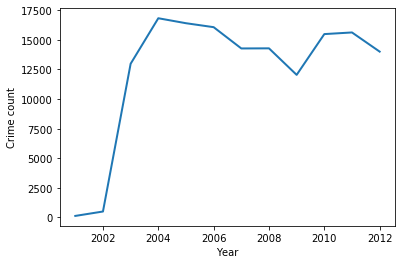

In [27]:
import matplotlib.pyplot as plt
plt.plot(crime_by_year['Year'], crime_by_year['Crime_count'], linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Crime count')

In general, does it look like crime increases from 2009 - 2011.

Grouping the record of arrests according to each year.

In [28]:
data[data['Arrest'] == True].groupby('Year').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,month,day
Year,,,,,,,,,,,
2001,3,3,3,3,3,3,3,3,3,3,3
2002,23,23,23,23,23,23,23,23,23,23,23
2003,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415
2004,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691,1691
2005,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523,1523
2006,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
2007,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
2008,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013,1013
2009,832,832,832,832,832,832,832,832,832,832,832




Making a list of arrest made each year and putting into a dataframe

In [29]:
arrest_by_year = pd.DataFrame({'Year':[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012], 
                               'Arrest_count': [3, 23, 1415, 1691, 1523, 1301, 1212, 1013, 832, 700, 625, 547]})

In [30]:
arrest_by_year.head()

,Year,Arrest_count
0,2001,3
1,2002,23
2,2003,1415
3,2004,1691
4,2005,1523


First half record of arrests(2001 - 2006)

In [31]:
arrest_by_year.iloc[0:6]

,Year,Arrest_count
0,2001,3
1,2002,23
2,2003,1415
3,2004,1691
4,2005,1523
5,2006,1301


Second half record of arrest (2007 - 2012)

In [32]:
arrest_by_year.iloc[6:12]

,Year,Arrest_count
6,2007,1212
7,2008,1013
8,2009,832
9,2010,700
10,2011,625
11,2012,547


In [33]:
print(arrest_by_year.iloc[0:6].sum())
print(arrest_by_year.iloc[6:12].sum())

Year            12021
Arrest_count     5956
dtype: int64
Year            12057
Arrest_count     4929
dtype: int64


Crimes for which more arrests were made are in the first half of the time period or the second half of the time period?
Answer: First half

Making two dataframes, one counting no. of arrest, others no arrest for the year 2001

In [34]:
count_arrest_2001 = data[(data['Arrest'] == True) & (data['Year'] == 2001)]

In [35]:
no_arrest_2001 = data[(data['Arrest'] == False) & (data['Year'] == 2001)]

In [36]:
count_arrest_2001

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
180107,180107,1734005,2001-10-08 12:00:00,OTHER,True,False,122,1,32,2001,10,Monday
173979,173979,1867234,2001-11-11 12:00:00,PARKING LOT/GARAGE(NON.RESID.),True,False,833,8,64,2001,11,Sunday
173954,173954,1842423,2001-11-11 20:30:00,STREET,True,False,814,8,56,2001,11,Sunday


In [37]:
count_arrest_2001.count()

Unnamed: 0             3
ID                     3
Date                   3
LocationDescription    3
Arrest                 3
Domestic               3
Beat                   3
District               3
CommunityArea          3
Year                   3
month                  3
day                    3
dtype: int64

In [38]:
no_arrest_2001.count()

Unnamed: 0             119
ID                     119
Date                   119
LocationDescription    119
Arrest                 119
Domestic               119
Beat                   119
District               119
CommunityArea          119
Year                   119
month                  119
day                    119
dtype: int64

In [39]:
3/121

0.024793388429752067

****Answer not matching****
approx. 0.02

Making two dataframes, one counting no. of arrest, others no arrest for the year 2007

In [40]:
count_arrest_2007 = data[(data['Arrest'] == True) & (data['Year'] == 2007)]

In [41]:
no_arrest_2007 = data[(data['Arrest'] == True) & (data['Year'] == 2007)]

In [42]:
count_arrest_2007.count()


Unnamed: 0             1212
ID                     1212
Date                   1212
LocationDescription    1212
Arrest                 1212
Domestic               1212
Beat                   1212
District               1212
CommunityArea          1212
Year                   1212
month                  1212
day                    1212
dtype: int64

In [43]:
no_arrest_2007.count()

Unnamed: 0             1212
ID                     1212
Date                   1212
LocationDescription    1212
Arrest                 1212
Domestic               1212
Beat                   1212
District               1212
CommunityArea          1212
Year                   1212
month                  1212
day                    1212
dtype: int64

Proportion = 0.50

In [44]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
191605,191605,1310988,2001-01-01 17:00:00,STREET,False,False,831,8,66,2001,1,Monday
188849,188849,1402871,2001-01-03 00:00:00,STREET,False,False,233,2,40,2001,1,Wednesday
182575,182575,1611268,2001-01-07 23:00:00,STREET,False,False,2532,25,25,2001,1,Sunday
180667,180667,1806334,2001-01-08 12:00:00,PARKING LOT/GARAGE(NON.RESID.),False,False,813,8,56,2001,1,Monday
178872,178872,1753476,2001-01-09 12:00:00,STREET,False,False,834,8,70,2001,1,Tuesday


Making a dataframe to show no. of records by each location

In [45]:
location_wise_crime = data.groupby('LocationDescription')['ID'].count()

In [46]:
location_wise_crime.sort_values(ascending = False).head(10)

LocationDescription
STREET                            122572
PARKING LOT/GARAGE(NON.RESID.)     10310
OTHER                               3270
ALLEY                               1688
GAS STATION                         1584
RESIDENTIAL YARD (FRONT/BACK)       1507
DRIVEWAY - RESIDENTIAL              1371
RESIDENCE                           1000
RESIDENCE-GARAGE                     965
VACANT LOT/LAND                      793
Name: ID, dtype: int64

Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?
1. Street
2. PARKING LOT/GARAGE(NON.RESID.)
3. ALLEY 
4. GAS STATION
5. DRIVEWAY - RESIDENTIAL 

Taking head 7 because two locations they've not considered i.e "Other" and "RESIDENTIAL YARD (FRONT/BACK)".  Sp Top(7) - Top(2) = Top(5)!

In [47]:
Top5 = location_wise_crime.sort_values(ascending = False).head(7).sum()

In [48]:
print(Top5)

142302


 But we are excluding "Others"(= 3270) and "RESIDENTIAL YARD (FRONT/BACK)"(1507). So, subtract those two from 139424

In [49]:
139424 - 3270 - 1507

134647

Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?
Answer = 134647

In [50]:
data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month,day
191605,191605,1310988,2001-01-01 17:00:00,STREET,False,False,831,8,66,2001,1,Monday
188849,188849,1402871,2001-01-03 00:00:00,STREET,False,False,233,2,40,2001,1,Wednesday
182575,182575,1611268,2001-01-07 23:00:00,STREET,False,False,2532,25,25,2001,1,Sunday
180667,180667,1806334,2001-01-08 12:00:00,PARKING LOT/GARAGE(NON.RESID.),False,False,813,8,56,2001,1,Monday
178872,178872,1753476,2001-01-09 12:00:00,STREET,False,False,834,8,70,2001,1,Tuesday


Creating a dataframe where the location is 'Gas station' and finding no. if thefts for each day of the week

In [51]:
data[data['LocationDescription'] == 'GAS STATION'].groupby('day').count()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
day,,,,,,,,,,,
Friday,239,239,239,239,239,239,239,239,239,239,239
Monday,207,207,207,207,207,207,207,207,207,207,207
Saturday,269,269,269,269,269,269,269,269,269,269,269
Sunday,231,231,231,231,231,231,231,231,231,231,231
Thursday,216,216,216,216,216,216,216,216,216,216,216
Tuesday,200,200,200,200,200,200,200,200,200,200,200
Wednesday,222,222,222,222,222,222,222,222,222,222,222


On which day of the week do the most motor vehicle thefts at gas stations happen?
Answer: Saturday